In [1]:
# yolo v3와 v5의 성능 차이에 대해서는 아래 링크 참조
# https://www.inflearn.com/questions/399333

In [2]:
import sys
import numpy as np
import cv2

In [3]:
# 모델 & 설정 파일
# Weight file : 훈련된 모델, Object detection 알고리즘의 핵심이다. (yolov3.weights)
# Cfg file : 구성파일. 알고리즘에 관한 모든 설정이 있다. (yolov3.cfg)
# Name files : 알고리즘이 감지할 수 있는 객체의 이름을 포함한다. (coco.names)

model = './yolo_v3/yolov3.weights'    # 모델 가중치
config = './yolo_v3/yolov3.cfg'       # 네트쿼크 구조 및 설정
class_labels = './yolo_v3/coco.names' # label category



In [4]:
# 테스트 이미지 파일
img_files = ['./yolo_v3/fig/dog.jpg', './yolo_v3/fig/person.jpg', 
             './yolo_v3/fig/sheep.jpg', './yolo_v3/fig/kite.jpg']

print(img_files)

['./yolo_v3/fig/dog.jpg', './yolo_v3/fig/person.jpg', './yolo_v3/fig/sheep.jpg', './yolo_v3/fig/kite.jpg']


In [5]:
net = cv2.dnn.readNet(model, config)

if net.empty():
    print('Net open failed')
    sys.exit()
    
print(net.__class__)

<class 'cv2.dnn_Net'>


In [6]:
classes = []

with open(class_labels, 'rt') as f:
    classes = f.read().rstrip('\n').split('\n')

print(classes)
print(classes[0])

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
person


In [7]:
# box 색을 정한다. class(label 객체 category) 수만큼 정해준다.
colors = np.random.uniform(0, 255, size=(len(classes), 3))

print(colors)

[[2.26874559e+02 2.41909332e+02 7.53474260e+01]
 [1.75872127e+02 3.70894196e+01 9.86937260e+01]
 [1.14649613e+02 4.99001591e+01 2.41602443e+02]
 [2.40517749e+02 1.41399748e+02 1.85509139e+01]
 [1.10901150e+02 4.04101717e+01 3.28829643e+01]
 [1.33410978e+01 7.31361329e-02 2.31196647e+02]
 [1.80437697e+02 1.51782570e+02 3.58645017e+01]
 [1.69125136e+02 1.55803580e+02 2.25048709e+02]
 [1.86699287e+02 1.45564921e+02 2.23852617e+01]
 [1.48885164e+02 1.54490213e+01 1.58790722e+02]
 [2.05515011e+02 4.90440531e+00 6.49937642e+01]
 [1.31894135e+02 1.13404740e+02 1.02540792e+02]
 [6.16918127e+01 1.25803955e+02 1.33758549e+02]
 [2.50502377e+02 2.51822757e+01 1.23411425e+02]
 [1.18562539e+02 1.08392387e+02 6.09314549e+01]
 [2.63290524e+01 1.72460268e+02 2.88473157e+00]
 [2.48600468e+02 1.87550262e+02 4.50424171e+01]
 [2.16073516e+02 8.76860464e+01 1.40535375e+02]
 [5.02569119e+01 1.21624731e+02 6.86979078e+01]
 [2.40275670e+02 1.83562551e+02 6.09575936e+01]
 [1.17011059e+02 1.91357910e+02 1.710374

In [8]:
# yolo layer의 순서와 이름을 찾는다.
layer_names = net.getLayerNames()
print(layer_names)

('conv_0', 'bn_0', 'leaky_1', 'conv_1', 'bn_1', 'leaky_2', 'conv_2', 'bn_2', 'leaky_3', 'conv_3', 'bn_3', 'leaky_4', 'shortcut_4', 'conv_5', 'bn_5', 'leaky_6', 'conv_6', 'bn_6', 'leaky_7', 'conv_7', 'bn_7', 'leaky_8', 'shortcut_8', 'conv_9', 'bn_9', 'leaky_10', 'conv_10', 'bn_10', 'leaky_11', 'shortcut_11', 'conv_12', 'bn_12', 'leaky_13', 'conv_13', 'bn_13', 'leaky_14', 'conv_14', 'bn_14', 'leaky_15', 'shortcut_15', 'conv_16', 'bn_16', 'leaky_17', 'conv_17', 'bn_17', 'leaky_18', 'shortcut_18', 'conv_19', 'bn_19', 'leaky_20', 'conv_20', 'bn_20', 'leaky_21', 'shortcut_21', 'conv_22', 'bn_22', 'leaky_23', 'conv_23', 'bn_23', 'leaky_24', 'shortcut_24', 'conv_25', 'bn_25', 'leaky_26', 'conv_26', 'bn_26', 'leaky_27', 'shortcut_27', 'conv_28', 'bn_28', 'leaky_29', 'conv_29', 'bn_29', 'leaky_30', 'shortcut_30', 'conv_31', 'bn_31', 'leaky_32', 'conv_32', 'bn_32', 'leaky_33', 'shortcut_33', 'conv_34', 'bn_34', 'leaky_35', 'conv_35', 'bn_35', 'leaky_36', 'shortcut_36', 'conv_37', 'bn_37', 'leaky_

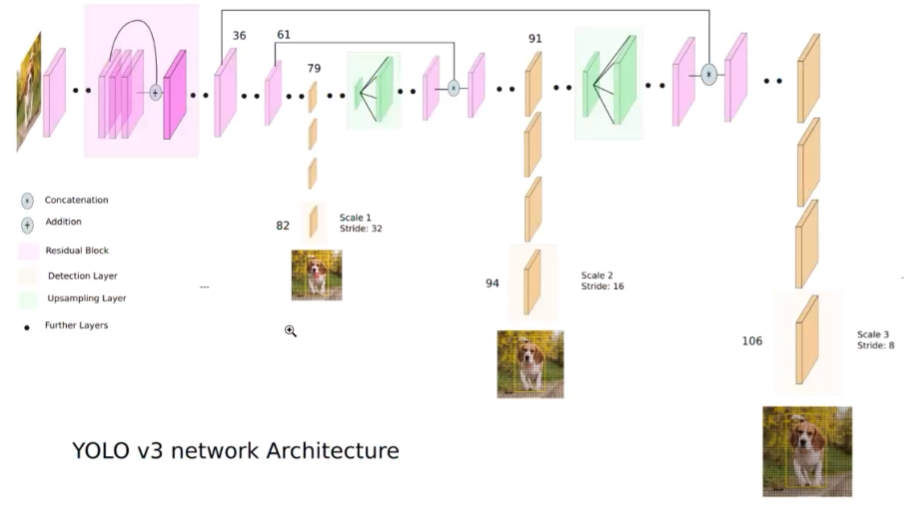

In [9]:
# network가 끊긴 layer를 찾는다. network가 끊긴 layer -1이 바로 우리가 찾는 layer다
# network가 끊긴 이유는, 결과가 나오는 레이어이기 때문이다.
# 잘 모르겠으면 해당 layer로 구글로 검색해볼 것
output_layers = [layer_names[i-1] for i in net.getUnconnectedOutLayers()]
print(output_layers)

['yolo_82', 'yolo_94', 'yolo_106']


In [18]:
confThreshold = 0.5
nmsThreshold = 0.4


# 웹캠 연동
cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('Videocap open failed')
    sys.exit()
    
while True:
    ret, frame = cap.read()
    
    if not ret:
        print('Video read failed')
        break
    # 실행
    if frame is None:
        continue

    # 블롭 생성 & 추론
    # the scale factor (1/255 to scale the pixel values to [0..1])
    # the size, here a 416x416 square image
    # the mean value (default=0)
    # the option swapBR=True (since OpenCV uses BGR)
    # blob의 size가 적을 수록 ms가 줄어든다. (
    # 단 256, 128, 64, 32면 가능, 32 배수가 아니면 shape에러 발생)
    # -201:Incorrect size of input array) Inconsistent shape for ConcatLayer in...
    # image 사이즈가 32면 너무 인식률이 낮고(0.5이하), 256 이상은 너무 프레임 저하가 심하다.
    blob = cv2.dnn.blobFromImage(frame, 1/255., (128, 128), swapRB=True)
    net.setInput(blob)
    outs = net.forward(output_layers)
    h, w = frame.shape[:2]

    class_ids = []
    confidences = []
    boxes = []

    for out in outs:
        for detection in out:
            # detection: 4(bounding box) + 1(objectness_score) + 80(class confidence)
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > confThreshold:
                # 바운딩 박스 중심 좌표 & 박스 크기
                cx = int(detection[0] * w)
                cy = int(detection[1] * h)
                bw = int(detection[2] * w)
                bh = int(detection[3] * h)

                # 바운딩 박스 좌상단 좌표
                sx = int(cx - bw / 2)
                sy = int(cy - bh / 2)

                boxes.append([sx, sy, bw, bh])
                confidences.append(float(confidence))
                class_ids.append(int(class_id))

    # 비최대 억제, Non Max Suppression
    # https://www.visiongeek.io/2018/07/yolo-object-detection-opencv-python.html
    # 객체를 탐지할 때, 같은 객체임에도 박스들이 여러개 생성될 수 있다. (박스란? 감지된 객체를 둘러싼 사각형)
    # 박스 중복을 방지하기 위해 noise를 지워주는 과정이 필요
    indices = cv2.dnn.NMSBoxes(boxes, confidences, confThreshold, nmsThreshold)

    for i in indices:

        sx, sy, bw, bh = boxes[i]
        label = f'{classes[class_ids[i]]}: {confidences[i]:.2}'
        color = colors[class_ids[i]]
        cv2.rectangle(frame, (sx, sy, bw, bh), color, 2)
        cv2.putText(frame, label, (sx, sy - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2, cv2.LINE_AA)

    t, _ = net.getPerfProfile()

#  net.getPerfProfile(): Returns overall time for inference and timings (in ticks) for layers
#  cv2.getTickFrequency(): Returns the number of ticks per second.

#     label = 'Inference time: %.2f ms' % (t * 1000.0 / cv2.getTickFrequency())
    label = 'Inference time: {:.3f} ms'.format(t * 1000.0 / cv2.getTickFrequency())

    cv2.putText(frame, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
                0.7, (0, 0, 255), 2, cv2.LINE_AA) 


    cv2.imshow('frame', frame)
    
    if cv2.waitKey(30) == 27:
        break
        
# 캠을 반드시 닫아준다. 계속 프로그램이 점유해서는 안되기 때문에
cap.release()
cv2.destroyAllWindows()

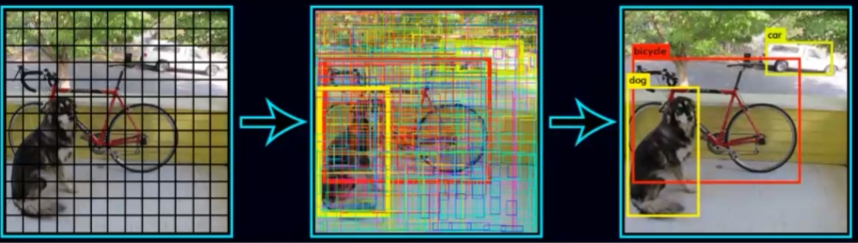

2번째 그림을 주목한다. yolo v3는 이 단계에서 수없이 많은 박스를 생성한다.

300개의 박스

1200개의 박스

4800개의 박스


In [ ]:
print('최종 박스 건수 :', len(outs)) # 3개의 객체가 찾아졌다.
print(outs[0].shape) # (300, 85)
print(outs[1].shape) # (1200, 85)
print(outs[2].shape) # (4800, 85) 
# 결론 : 점점 이미지가 더 커진다. 하지만 벡터 크기는 85로 일정하다.
# 이는 파라미터 85개로 yolo v3에서 측정한 요소들이다.
# 85개의 백터는 x, y, width, height,물체가 있을 확률 + 80건의 파라미터로 이뤄졌다.
# 80건의 파라미터는 classname(물체의 category)의 건수다. ex) 커피, 도넷... etc